# Computing $\Lambda_{E,d}(t)$

** Some details below of the definition of $\alpha$ are wrong.**

## The Definition

Let $E$ be a non-CM elliptic curve over $\QQ$.

Let $d>2$ be an odd positive integer.

Let $\chi$ vary over Dirichlet characters of order $d$ whose conductor $m$ is coprime to the conductor $N$ of $E$.

We have
$$
L(E,\overline{\chi},1) = \frac{1}{\tau(\chi)} \cdot 
   \sum_{a\in (\ZZ/m\ZZ)^*} \chi(a)\cdot  
      \left \langle\frac{a}{m} \right \rangle^{\pm}_E
$$
where $\pm$ is the sign of $\chi$, $\tau(\chi)$ is the Gauss sum, and 
$$
\left \langle\frac{a}{m} \right \rangle^{\pm}_E
 = \pi i 
 \left(  
 \int_{i\infty}^{r} f dz \pm \int_{i\infty}^{-r} f dz 
  \right)
$$
is the $\pm$ period mapping.

To make things very concrete we **assume that $m$ is prime**.  This is not necessary.

Let $G$ denote the quotient of $(\ZZ/m\ZZ)^*$ of order $d$, so we have
an exact sequence
$$
   1 \to H \to (\ZZ/m\ZZ)^* \to G \to 1
$$
where $H$ is the unique subgroup of $(\ZZ/m\ZZ)^*$
of order $n = \varphi(m)/d$.

Choose a generator $h\in (\ZZ/m\ZZ)^*$, i.e., any
element of $\varphi(m)$ of order $\varphi(m)/d$,
so $H=\langle h \rangle$.

Choose $b \in (\ZZ/m\ZZ)^*$ of order $\varphi(m)$, and
write
$$(\ZZ/m\ZZ)^*
 = Hb^0 \cup Hb^1 \cdots \cup Hb^{d-1}
  \qquad \text{(disjoint union)}
$$

Since $\chi(H)=\{1\}$, we have
$$
L(E,\overline{\chi},1) = 
\frac{1}{\tau(\chi)} \cdot 
 \sum_{i=0}^{d-1} \left( \chi(b^i) 
   \sum_{j=0}^{n-1} 
   \left\langle \frac{b^i h^j}{m} \right\rangle^{\pm}_E
 \right)
$$

Fix $\omega_{E}^{\pm}$ so that 
$\left \langle\frac{a}{m} \right \rangle^{\pm}_E$
is an algebraic multiple of $\omega_{E}^{\pm}$
(so, e.g., $\omega_{E}^{\pm}$ might just be the least
real or imaginary period of $E$). The
*rational period mapping* is
$$
\left [ \frac{a}{m} \right ] ^{\pm}_E =
\frac{\left \langle\frac{a}{m} \right \rangle^{\pm}_E}
{\omega_E^{\pm}} \in \QQ.
$$

$$
L(E,\overline{\chi},1) = 
\frac{\omega_E^\pm}{\tau(\chi)} \cdot 
 \sum_{i=0}^{d-1} \left( \chi(b^i) 
   \sum_{j=0}^{n-1} 
   \left [ \frac{b^i h^j}{m} \right ]^{\pm}_E
 \right)
$$

For $i=0,1,\ldots, \frac{d-1}{2}$, let
$$
  \alpha_m^{\pm}(i) = 
  \frac{1}{\sqrt{\varphi(m)\log(m)}} \cdot
  \sum_{j=0}^{n-1} 
   \left [ \frac{N^{(d-1)/2} b^i h^j}{m} \right ]^{\pm}_E
   \in \RR.
$$


The distribution $\Lambda_{E,d}$
is the distribution of real numbers $\alpha_m(i)$, where
we vary over all $m$ and $i>0$.
More concretely, for each integer $m$ coprime to $N_E$ such
that $d \mid \varphi(m)$, compute the $d$ real numbers
$\alpha_m(i)$ and add them to our set of values.   The 
distribution $\Lambda_{E,d}$ is then the result of doing 
this as $m$ goes to $\infty$.

NOTE: The term $\alpha_m(0)$ is the **sensitive theta coefficient**.

Regarding *complexity* the work in doing this computation
is the work of computing the rational numbers
$[a/m]_E^\pm $ for all $a$.  It's the same bottlekneck
that goes into approximating $p$-adic $L$-series using
the classical Riemann sums algorithm.  The code in Sage
for this is fairly slow, but I have some fast code in psage,
which I used for some papers on $p$-adic $L$-series.

## Example 11a

In terms of Sage, the `rational_period_mapping`
method on a modular symbols space computes
a choice of $[a/m]_E^{\pm}$:

In [12]:
M = ModularSymbols(11,sign=1).cuspidal_submodule()
N = M.level()
f = M.rational_period_mapping()
f([oo, 1/11])  # a/m = 1/11

(0)

In [24]:
d = 3
ms = [m for m in prime_range(2000) if gcd(m, 11) == 1 and euler_phi(m) % d == 0 and m%2==1]
print(ms)

[7, 13, 19, 31, 37, 43, 61, 67, 73, 79, 97, 103, 109, 127, 139, 151, 157, 163, 181, 193, 199, 211, 223, 229, 241, 271, 277, 283, 307, 313, 331, 337, 349, 367, 373, 379, 397, 409, 421, 433, 439, 457, 463, 487, 499, 523, 541, 547, 571, 577, 601, 607, 613, 619, 631, 643, 661, 673, 691, 709, 727, 733, 739, 751, 757, 769, 787, 811, 823, 829, 853, 859, 877, 883, 907, 919, 937, 967, 991, 997, 1009, 1021, 1033, 1039, 1051, 1063, 1069, 1087, 1093, 1117, 1123, 1129, 1153, 1171, 1201, 1213, 1231, 1237, 1249, 1279, 1291, 1297, 1303, 1321, 1327, 1381, 1399, 1423, 1429, 1447, 1453, 1459, 1471, 1483, 1489, 1531, 1543, 1549, 1567, 1579, 1597, 1609, 1621, 1627, 1657, 1663, 1669, 1693, 1699, 1723, 1741, 1747, 1753, 1759, 1777, 1783, 1789, 1801, 1831, 1861, 1867, 1873, 1879, 1933, 1951, 1987, 1993, 1999]


In [41]:
def alphas(m, d, normalize=True):
    assert d%2 == 1
    R = Integers(m)
    Npow = R(N)^((d-1)//2)
    gen = R(primitive_root(m))
    n = euler_phi(m)//d
    b = gen
    h = gen^d
    if normalize:
        denom = float(sqrt(euler_phi(m)*log(m)))
    else:
        denom = 1
    alphas = []
    for i in range(1, (d-1)//2 + 1):
        s = 0
        for j in range(n):
            symb = [oo, (Npow * b^i * h^j).lift() / ZZ(m)]
            period = f(symb)[0]
            s += period
        alphas.append(s / denom)
    return alphas

In [42]:
print ms[0]
alphas(ms[0], d, normalize=False)

7


[7]

In [43]:
alphas(37, d, normalize=False)

[-33]

In [44]:
for i in range(10):
    print ms[i], alphas(ms[i], d, false)

7 [7]
13 [-16]
19 [16]
31 [10]
37 [-33]
43 [-11]
61 [20]
67 [22]
73 [9]
79 [21]


In [8]:
data = []
for m in ms:
    data += alphas(m, d)

In [9]:
len(data)

360

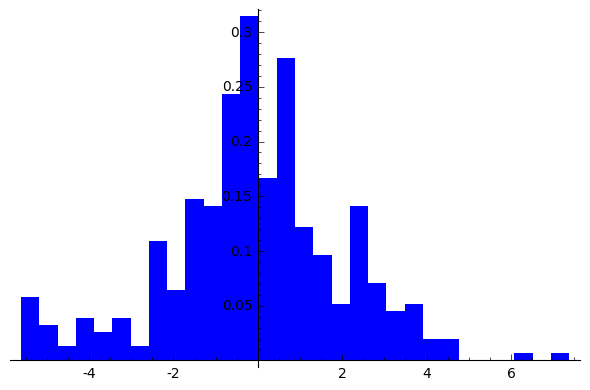

In [10]:
stats.TimeSeries(data).plot_histogram(bins=30)

In [11]:
# More data...
ms2 = [m for m in prime_range(2000,3000) if gcd(m, 11) == 1 and euler_phi(m) % d == 0 and m%2==1]
for m in ms2:
    data += alphas(m, d)

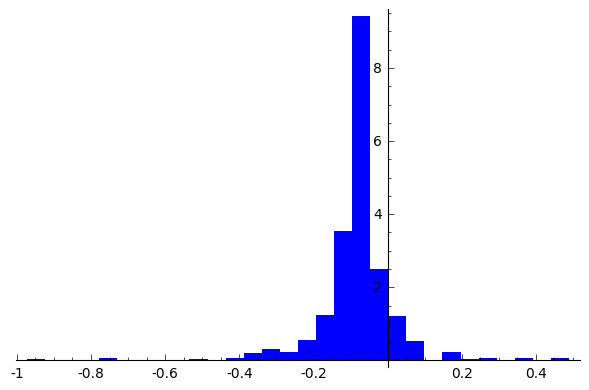

In [12]:
t = stats.TimeSeries(data)
t.plot_histogram(bins=30)

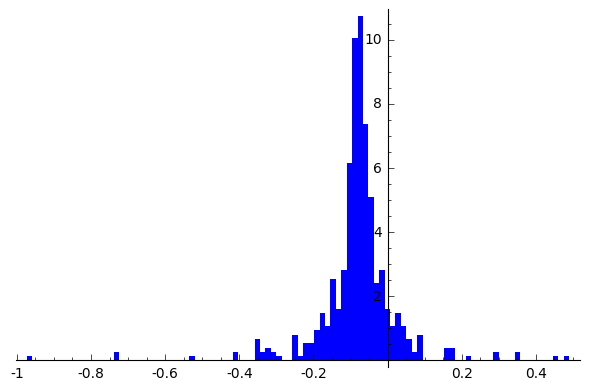

In [13]:
t.plot_histogram(bins=100)

In [14]:
print t.mean(), t.standard_deviation()

-0.0806714227685 0.110769030552


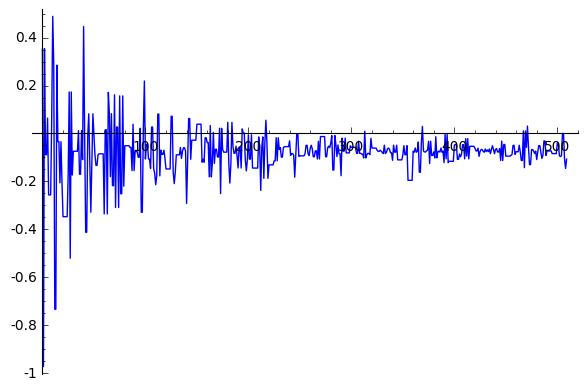

In [15]:
stats.TimeSeries(data).plot()

### Now try $d=29$

In [16]:
d = 29
ms = [m for m in prime_range(3,5000) if gcd(m, 11) == 1 and euler_phi(m) % d == 0]
print(ms)

[59, 233, 349, 523, 929, 1103, 1277, 1451, 1567, 1741, 1973, 2089, 2437, 2843, 3191, 3307, 3539, 4003, 4177, 4409, 4583, 4931]


In [17]:
print alphas(ms[0], d)

[0.04232831912577409, 0.04232831912577409, 0.04232831912577409, 0.04232831912577409, 0.04232831912577409, 0.04232831912577409, -0.16931327650309635, 0.04232831912577409, 0.04232831912577409, -0.16931327650309635, 0.04232831912577409, 0.04232831912577409, -0.16931327650309635, 0.04232831912577409, -0.16931327650309635, 0.04232831912577409, 0.04232831912577409, -0.16931327650309635, 0.04232831912577409, -0.16931327650309635, 0.04232831912577409, 0.04232831912577409, -0.16931327650309635, 0.04232831912577409, 0.04232831912577409, -0.16931327650309635, 0.04232831912577409, 0.04232831912577409, 0.04232831912577409]


In [18]:
data = []
for m in ms:
    data += alphas(m, d)

638
-0.0127456234641


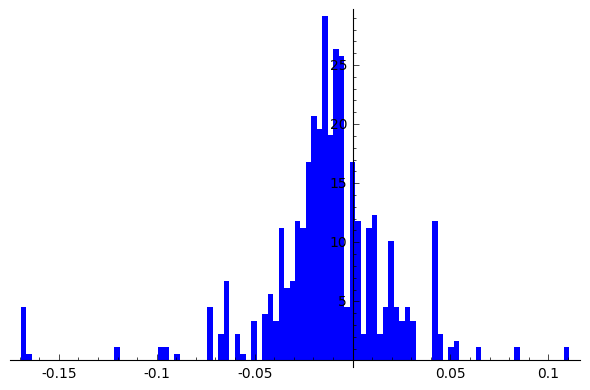

In [19]:
print len(data)
t = stats.TimeSeries(data)
print t.mean()
t.plot_histogram(bins=100)

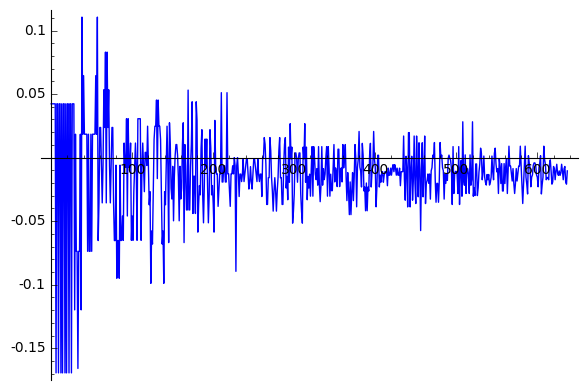

In [20]:
t.plot()

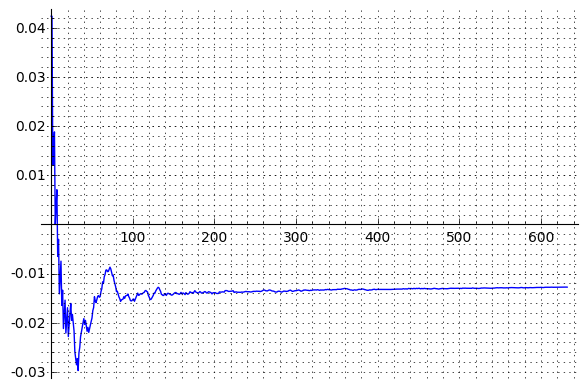

In [21]:
stats.TimeSeries(t[:i].mean() for i in range(5,len(t))).plot(gridlines='minor')